<a href="https://colab.research.google.com/github/Adityaroy000/Machine-Learning/blob/outliners/PracticalOfRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. **LINEAR REGRESSION**:




In [133]:
from sklearn.datasets import fetch_california_housing

In [134]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [135]:
housing = fetch_california_housing()
type(housing)

sklearn.utils._bunch.Bunch

In [136]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [137]:
dataset = pd.DataFrame(housing.data) #convert the scattered data of housing  into a table
dataset.columns = housing.feature_names # add corresponding feature name in each column
dataset.head() #displays the dataset

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [138]:
dataset['price'] = housing.target #create a new column 'price' and housing.target contains the target values (house prices).
print(dataset.columns)

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'price'],
      dtype='object')


In [139]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [140]:
##divind datset into dependent and independent features
X = dataset.iloc[:,:-1] ##independent features(we have skipped the last column bcz its a dependent feature)
Y = dataset.iloc[:,-1] ##dependent feature ( only last column is accepted)

In [141]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [142]:
Y.head()

,price
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [143]:
#Linear regression
from sklearn.linear_model import LinearRegression #import a linear regression model
from sklearn.model_selection import cross_val_score
lin_reg = LinearRegression()
#doing cross validation
mse = cross_val_score(lin_reg,X,Y,scoring = 'neg_mean_squared_error',cv=5)
mse_mean = np.mean(mse)
print(mse_mean)

-0.5582901717686546


In [144]:
lin_reg.fit(X,Y) #to train a model on given data(X,Y)
x_test = np.array([ [7.5, 35, 7.2, 1.05, 600, 2.6, 37.87, -122.21],
    [4.2, 40, 5.9, 1.1, 550, 2.3, 37.86, -122.22]]) #creating a test data
#When you train the model using X (which is a DataFrame with feature names), LinearRegression stores those feature names internally.
#When you later predict using x_test (which is a NumPy array without column names), sklearn warns you that the feature names are missing.
#to prevent this i am Converting x_test to a DataFrame so that  x_test includes feature names also ,using pandas
import pandas as pd
feature_names = X.columns # Get the column names from the training data
x_test_df = pd.DataFrame(x_test,columns=feature_names)# Convert x_test to DataFrame with the same column names

# Predict using the DataFrame instead of NumPy array
prediction  = lin_reg.predict(x_test_df) # will predict Y(price) on the basis of test data
print("Predicted price on the basis of given test data is : ",prediction)

Predicted price on the basis of given test data is :  [3.70265164 2.49040766]


In [145]:
#to check how much error my model is producing while predicting the training target values on which i have trained it
from sklearn.metrics import mean_squared_error
import numpy as np
y_predict = lin_reg.predict(X) # Predict on training data
mse = mean_squared_error(Y,y_predict) # Comparing y_predict with actual training target values Y
print("MSE: ",mse)

MSE:  0.5243209861846072


In [146]:
#another simple exmaple :
x = np.array([[1], [2], [3], [4], [5]])  # Features (Independent Variable)
y = np.array([2, 4, 6, 8, 10]) #target(dependent)
linear_reg = LinearRegression()
linear_reg.fit(x,y) # training the model on x and y training data
X_test = np.array([[500]])
prediction = linear_reg.predict(X_test) # will always take 2d array
print("Preicted output is: ",prediction)
from sklearn.metrics import mean_squared_error
y_predict = linear_reg.predict(x)
mse = mean_squared_error(y,y_predict)
print("MSE: ",mse)

Preicted output is:  [1000.]
MSE:  0.0


 2.**Ridge** **Rgeression**:

> Ridge is beneficial only if features are highly correlated.

>  If features are independent, Ridge may not be needed.

> It helps prevent overfitting, especially when handling too large datasets.






In [147]:
from sklearn.linear_model import Ridge # Implements Ridge Regression
from sklearn.model_selection import GridSearchCV # Performs hyperparameter tuning using cross-validation.
ridge = Ridge() # Creates a Ridge Regression Model Instance
param = {'alpha' : [1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20]} #Large alpha (e.g., 10, 20, etc.) → More regularization, which reduces overfitting but may underfit if too large.

#GridSearchCV will try all these values of alpha and find the best one.
ridge_regressor = GridSearchCV(ridge,param,scoring = 'neg_mean_squared_error',cv = 5) # Performs Hyperparameter Tuning Using Grid Search:
ridge_regressor.fit(X,Y)

#1️⃣ GridSearchCV tries all values of alpha in param.
#2️⃣ For each alpha, it trains the model 5 times (because cv=5).
#3️⃣ It calculates the mean of the MSE values for each alpha.
#4️⃣ It selects the alpha that gives the lowest MSE.

print("Best alpha: ",ridge_regressor.best_params_['alpha'])
print("Best MSE: ",ridge_regressor.best_score_)

Best alpha:  20
Best MSE:  -0.5581020035625641


**Lasso** **Regeression**

In [132]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
laso = Lasso()
parameter = {'alpha' : [1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20]}

laso_regressor = GridSearchCV(laso,parameter,scoring = 'neg_mean_squared_error',cv = 5)
laso_regressor.fit(X,Y)

print("Best alpha: ",laso_regressor.best_params_['alpha'])
print("Best MSE: ",laso_regressor.best_score_)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.875e+03, tolerance: 2.228e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.076e+03, tolerance: 2.256e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.419e+03, tolerance: 2.110e

Best alpha:  0.001
Best MSE:  -0.558275929386899


**Logistic Regression** :

In [148]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [149]:
df['species'].unique() #gives all the unique species

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [150]:
#now we will check if there is any  null value or not
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [151]:
#here we have 3 unique species so its not a binary classification , its a multiclassification
#as we will be doing binary so we will delete all the data of setosa from this dataset
df['species']!='setosa' #jaha jaha setosa nhi h waha sare ture honge aur jaha hai wo false hoga

,species
0,False
1,False
2,False
3,False
4,False
...,...
145,True
146,True
147,True
148,True


In [152]:
#if we want to see only those data points which contains verginica and versicolor then we will do this
df = df[df['species']!='setosa']
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


In [153]:
#here versicolor and virginica are two category so we will represent it by numerical format and to do this we will use map:
df['species'] = df['species'].map({'versicolor':0,'virginica': 1})

In [154]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,0
51,6.4,3.2,4.5,1.5,0
52,6.9,3.1,4.9,1.5,0
53,5.5,2.3,4.0,1.3,0
54,6.5,2.8,4.6,1.5,0


now we will split our dataset in to dependent and independent features

In [155]:
X=df.iloc[:,:-1] #will select all the independent feature except last column(which is a dependent feature)
y=df.iloc[:,-1] #selects dependent feature (that is species here)

In [156]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
50,7.0,3.2,4.7,1.4
51,6.4,3.2,4.5,1.5
52,6.9,3.1,4.9,1.5
53,5.5,2.3,4.0,1.3
54,6.5,2.8,4.6,1.5


In [157]:
y.head()

,species
50,0
51,0
52,0
53,0
54,0


In [158]:
#now we will do train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [159]:
#test data is used for validation purpose
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

In [160]:
from sklearn.model_selection import GridSearchCV
#parameters need to be written in dictionary and also we can play with so many parameter depending upon our need
parameter = {'penalty':['l1','l2','elasticnet'],'C':[1,2,3,4,5,6,10,20,30,50],'max_iter':[100,200,300]}

In [161]:
#in case of logistic regression we always use scoring = 'accuracy'
classifier_regressor = GridSearchCV(classifier,param_grid=parameter,scoring='accuracy',cv = 5)

In [162]:
classifier_regressor.fit(X_train,y_train) #our model have been trained now

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
300 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_sol

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 50],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [163]:
#to find the best parameter that have been selected among all the parameter that we gave
print(classifier_regressor.best_params_)

{'C': 1, 'max_iter': 100, 'penalty': 'l2'}


In [164]:
#and to find the best accuracy
print(classifier_regressor.best_score_)

0.9733333333333334


In [165]:
#now predicting by using the same model
y_predict = classifier_regressor.predict(X_test)

In [166]:
#now we will check the test accuracy score of our prediction
from sklearn.metrics import accuracy_score,classification_report
score = accuracy_score(y_predict,y_test)
print(score)

0.92


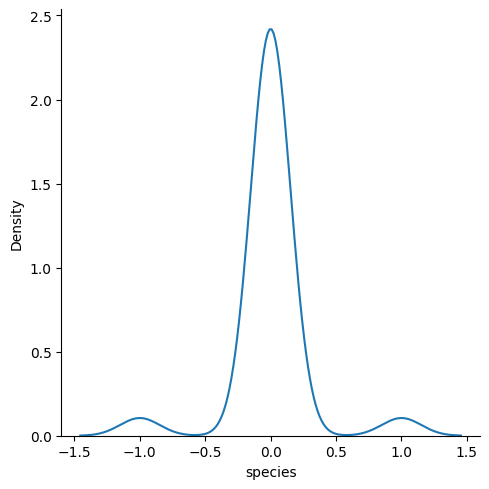

In [167]:
sns.displot(y_predict-y_test,kind='kde')